# Preprocessing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [3]:
df= pd.read_csv('Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [6]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
df.shape

(2200, 8)

In [8]:
labelencoder= LabelEncoder()
df['label']= labelencoder.fit_transform(df['label'])
class_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print("Class mapping:", class_mapping)

Class mapping: {'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [9]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


<Axes: >

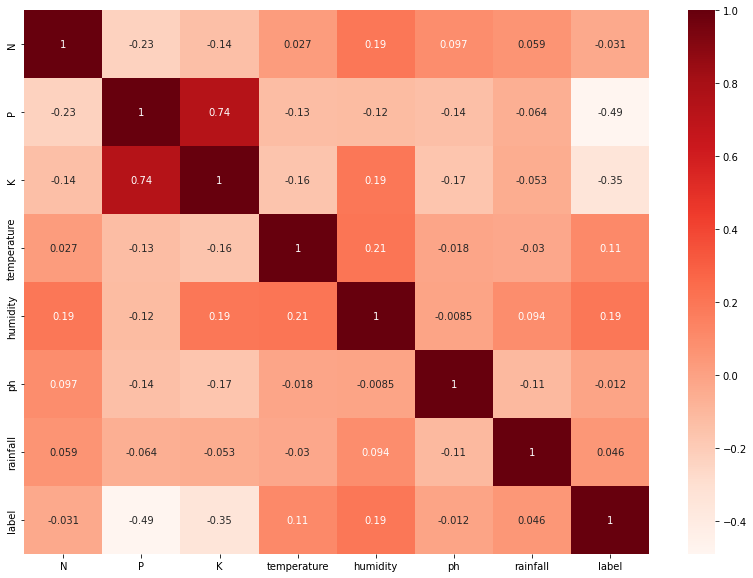

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,annot=True,cmap='Reds')

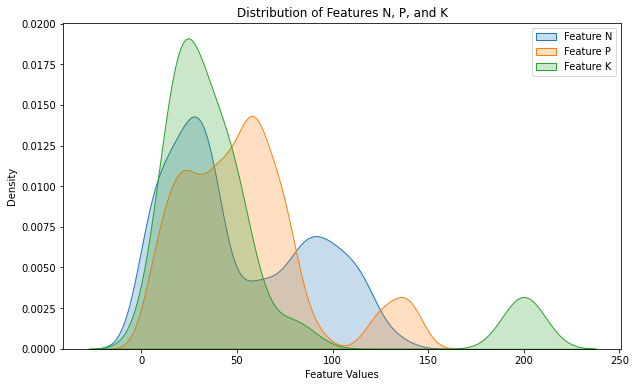

In [13]:
plt.figure(figsize=(10, 6))

# Plot multiple features in a single distplot
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.distplot(df['N'], label='Feature N', hist=False, kde_kws={'shade': True})
    sns.distplot(df['P'], label='Feature P', hist=False, kde_kws={'shade': True})
    sns.distplot(df['K'], label='Feature K', hist=False, kde_kws={'shade': True})
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.title('Distribution of Features N, P, and K')
plt.legend()
plt.show()

In [14]:
X= df.drop(columns = ['label', "ph", "rainfall"],axis =1)
y= df['label']

In [15]:
print(X.shape, y.shape)

(2200, 5) (2200,)


In [16]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size =0.2, stratify =y)
pickle.dump(scaler,open('scaler.pkl','wb'))

In [17]:
print(X.shape,X_train.shape,X_test.shape)

(2200, 5) (1760, 5) (440, 5)


# Model Selection

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score

model_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Gaussian NB", "Support Vector Classifier", "XG Boost"]
models = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=20), GaussianNB(), SVC(kernel='linear'), xgb.XGBClassifier()]

for model, name in zip(models, model_name):
    print(name, ": ")
    model.fit(X_train, y_train)
    y_train_pred= model.predict(X_train)
    y_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(name, "train accuracy: ", train_accuracy * 100)
    print(name, "test accuracy: ", accuracy * 100, "\n")


Logistic Regression : 
Logistic Regression train accuracy:  91.81818181818183
Logistic Regression test accuracy:  91.36363636363637 

Decision Tree : 
Decision Tree train accuracy:  100.0
Decision Tree test accuracy:  94.77272727272728 

Random Forest : 
Random Forest train accuracy:  100.0
Random Forest test accuracy:  96.36363636363636 

Gaussian NB : 
Gaussian NB train accuracy:  95.9659090909091
Gaussian NB test accuracy:  95.22727272727273 

Support Vector Classifier : 
Support Vector Classifier train accuracy:  93.63636363636364
Support Vector Classifier test accuracy:  92.04545454545455 

XG Boost : 
XG Boost train accuracy:  100.0
XG Boost test accuracy:  94.77272727272728 



# XGBOOST

In [19]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

random_search_xgb = RandomizedSearchCV(
    xgb.XGBClassifier(), param_distributions=param_grid_xgb, n_iter=10, scoring='accuracy', cv=5, verbose=2, random_state=42
)

In [20]:
random_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=150, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, ma

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [21]:
print("Best Parameters for XGBoost:", random_search_xgb.best_params_, "\n")
print("Best Accuracy for XGBoost:", random_search_xgb.best_score_*100)

Best Parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.9} 

Best Accuracy for XGBoost: 95.3409090909091


In [22]:
final_xgb = xgb.XGBClassifier(
    subsample=1.0,
    n_estimators=150,
    min_child_weight=5,
    max_depth=6,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=0.8
)

In [23]:
final_xgb.fit(X_train, y_train)
y_pred_xgb = final_xgb.predict(X_test)
xgb_accuracy_score = accuracy_score(y_pred_xgb, y_test)
print("Tuned XGB accuracy: ", xgb_accuracy_score*100)

Tuned XGB accuracy:  95.45454545454545


# Saving Our Model

In [25]:
pickle.dump(final_xgb,open('model.pkl','wb'))

In [26]:
filename='model.pkl'
pickle.dump(model,open(filename,'wb'))

In [27]:
load_model=pickle.load(open('model.pkl','rb'))

In [28]:
load_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [66]:
features = [90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362]

# Convert the features to a NumPy array and reshape it
feature_arr = np.asarray(features).reshape(1, -1)

# Scale the features using the scaler
scaled_features = scaler.fit_transform(feature_arr)

# Make predictions using the model
prediction = final_xgb.predict(scaled_features)

# Print or use the prediction as needed
print(prediction)

[11]


In [ ]:
print(prediction)

In [65]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [60]:
y.value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64